# Lead Scoring Case Study
### By Prateek Rana & Uday Suri



> An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. The company has a conversion rate of 30% and wish to make this process efficient by identifying the more potentially convertible leads or 'Hot Leads'. 

**Problem Statement:** To help them select the most promising leads. The company requires us to build a model which helps identify the leads' conversion rate. 

> We will use logistic regression to assign a lead score between 0 to 100 to each of the leads which can be used by the company to target potential leads. The steps for the same are as follows:

1. Data Understanding and Cleaning
2. Exploratory Data Analysis (EDA)
3. Outlier Analysis
4. Scaling
5. Training & Testing Data
6. Building the logistic regression model
7. Conclusion

## Step 1: Data Understanding and Cleaning

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
#Reading the data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Looking at the info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There seem to be some null values present in various columns. We must rectify this issue.

### Treating Missing Values

In [4]:
#Shape
leads.shape

(9240, 37)

In [5]:
#Length
len(leads)

9240

In [6]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
leads = leads.drop(['Prospect ID', 'Lead Number', 'Country', 'How did you hear about X Education', 
           'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 
           'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
           'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [8]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              15.56
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00


In [9]:
#Having a look at value counts of specialization
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

> We can see that Specialization column has values like select which are in majority. It could be that the visitor must have left the selection of their specialization at select. Thus, we must treat these values and convert them into NaN values.

In [10]:
#Replacing values of Specialization from select to nan
leads['Specialization'] = leads['Specialization'].apply(lambda x : np.nan if x == 'Select' else x)

In [11]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              36.58
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00


In [12]:
#Dropping Specialization
leads = leads.drop(['Specialization'], axis=1)

In [13]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00
City                                        15.37


In [14]:
#Looking at the values present in Lead Source
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
testone                 1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [15]:
#Selecting mode for treating missing values
leads['Lead Source'].mode().iloc[0]

'Google'

In [16]:
#Treating missing values in Lead Score
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode().iloc[0])

In [17]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00
City                                        15.37


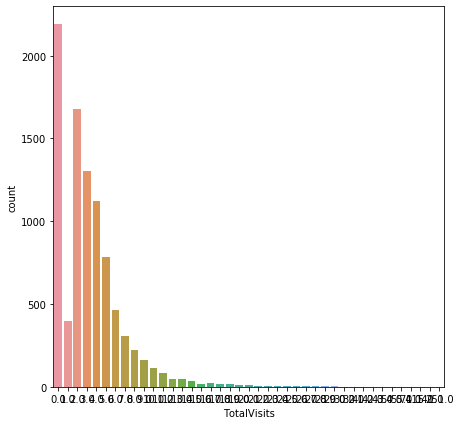

In [18]:
#Visualizing Total Visits
plt.figure(figsize=[7, 7])
sns.countplot(leads['TotalVisits']);

In [19]:
#Treating the missing values in the variable with mean
leads['TotalVisits'].fillna(leads['TotalVisits'].mean(), inplace=True)

In [20]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00
City                                        15.37


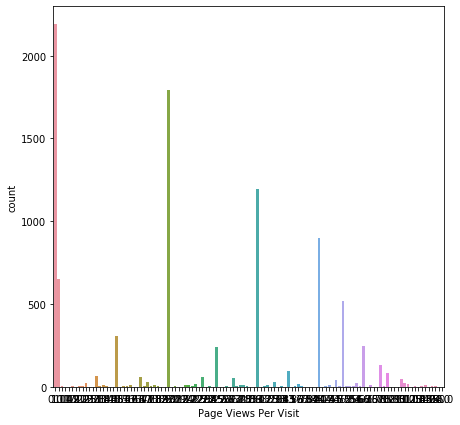

In [21]:
#Visualizing Page Views per Visit
plt.figure(figsize=[7, 7])
sns.countplot(leads['Page Views Per Visit']);

In [22]:
#Treating the missing values in the variable with mean
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean(), inplace=True)

In [23]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                1.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00
City                                        15.37


> We can drop *Last Activity* as we have *Last Notable Activity* which serves the same purpose

In [24]:
#Dropping Last Activity
leads = leads.drop(['Last Activity'], axis=1)

In [25]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00
City                                        15.37
I agree to pay the amount through cheque     0.00


In [26]:
#Having a look at value counts of City
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

> We can see that there are select values in the *City* variable. We must treat these as missing values.

In [27]:
#Replacing values of City from select to nan
leads['City'] = leads['City'].apply(lambda x : np.nan if x == 'Select' else x)

In [28]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Update me on Supply Chain Content            0.00
Get updates on DM Content                    0.00
City                                        39.71
I agree to pay the amount through cheque     0.00


In [29]:
#Dropping City
leads = leads.drop(['City'], axis=1)

In [30]:
#Percentage of missing values per col
leads.isna().mean().round(4)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                   

In [31]:
#Changing dtypes of TotalVisits and Page Views per Visit
leads['TotalVisits'] = leads['TotalVisits'].astype('int64')
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].astype('int64')

## Data Visualization

In [32]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Lead Origin                               9240 non-null   object
 1   Lead Source                               9240 non-null   object
 2   Do Not Email                              9240 non-null   object
 3   Do Not Call                               9240 non-null   object
 4   Converted                                 9240 non-null   int64 
 5   TotalVisits                               9240 non-null   int64 
 6   Total Time Spent on Website               9240 non-null   int64 
 7   Page Views Per Visit                      9240 non-null   int64 
 8   Search                                    9240 non-null   object
 9   Magazine                                  9240 non-null   object
 10  Newspaper Article                         9240 n

In [33]:
#Selecting Numerical Columns
num_cols = leads.describe().columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [34]:
# Setting style
sns.set_style("darkgrid")

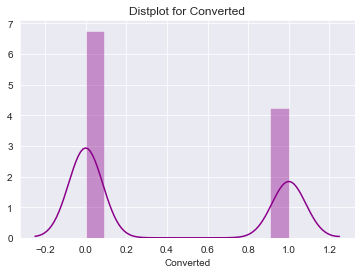

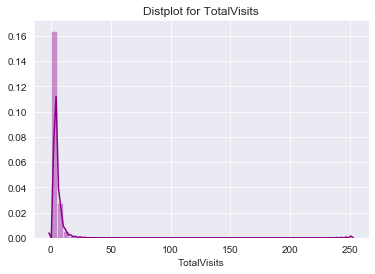

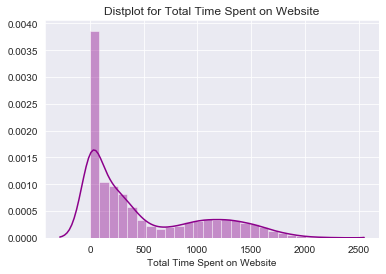

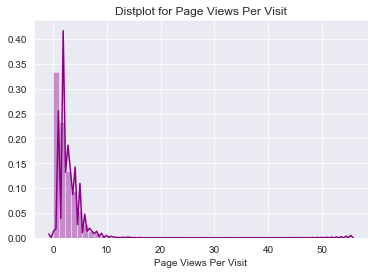

In [35]:
# Creating distplots
for col in num_cols:
    sns.distplot(leads[col], color = 'darkmagenta')
    plt.title('Distplot for ' + col)
    plt.show()

### Insights

- We already know that converted is the target variable and as we can see it only has two values which tells us that the lead is either converted(1) or not(0).
- All the other 3 displots for *Total Time Spent, Total Visits & Page Views Per Visit* are right skewed with outliers only in *Total Visits*.

### Checking for Outliers

Plotting  Converted


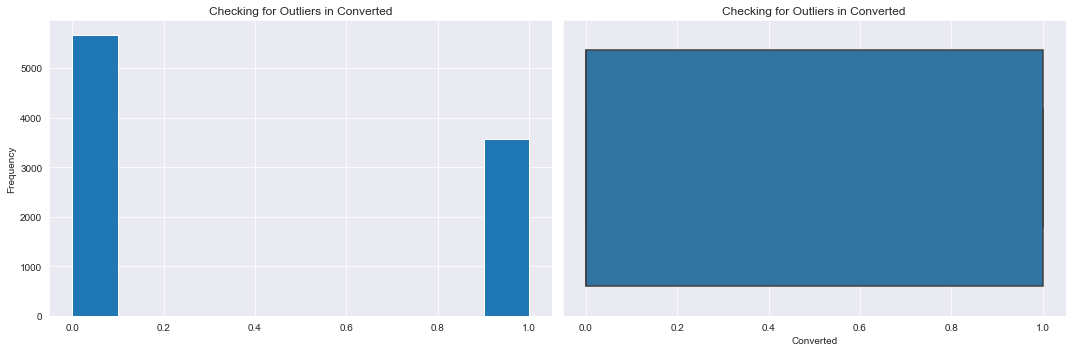

Plotting  TotalVisits


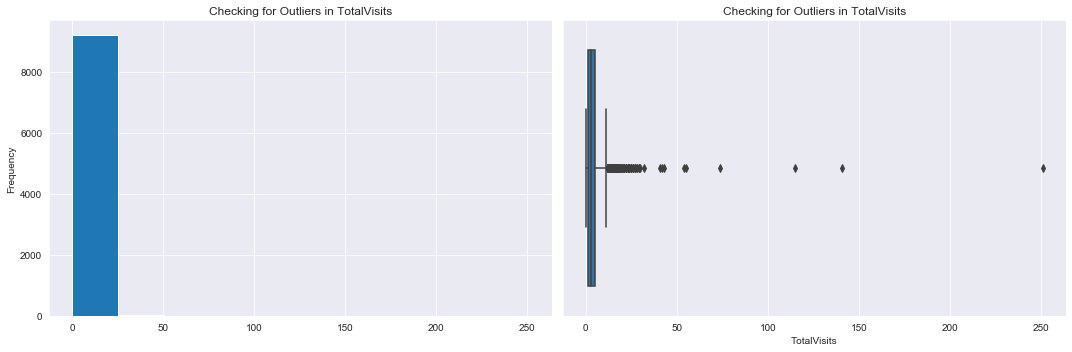

Plotting  Total Time Spent on Website


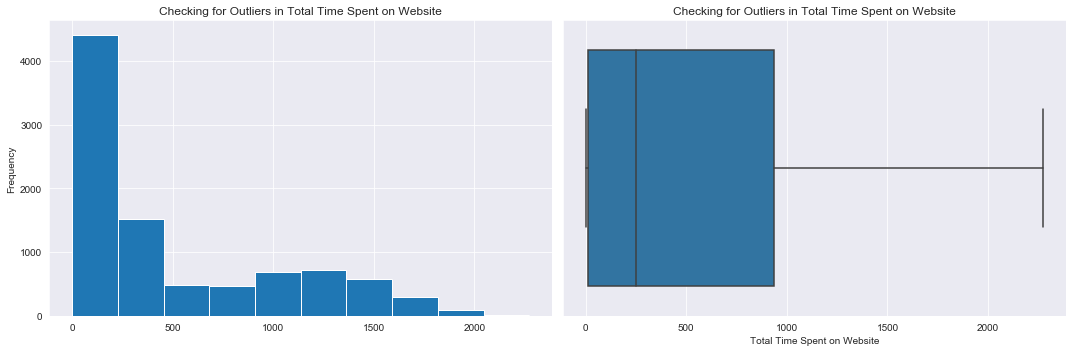

Plotting  Page Views Per Visit


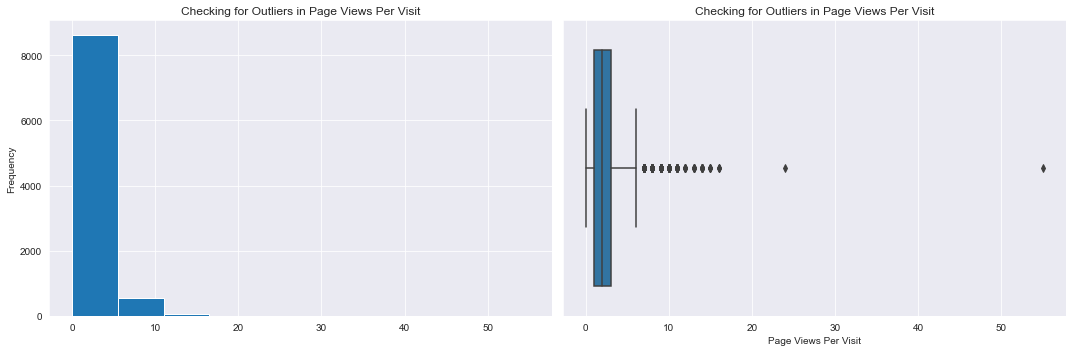

In [36]:
def data_info(df, column):
    
    fig = plt.figure(figsize=(15,5))
    
    ax1 = plt.subplot(121)
    df[column].plot.hist(ax=ax1);
    plt.title('Checking for Outliers in '+ column)
    
    ax2 = plt.subplot(122)
    sns.boxplot(x=df[column], ax=ax2);
    plt.title('Checking for Outliers in '+ column)
    
    fig.tight_layout()
    
    plt.show()
    

for column in num_cols:
    print("Plotting ", column)
    data_info(leads, column)

> Outliers are only present in *Page Views Per Visit & Total Visits*.

In [37]:
#Looking at the values that are more than 100 totalvisits
leads.query('TotalVisits >= 100')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2322,Landing Page Submission,Direct Traffic,Yes,No,0,141,755,6,No,No,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
5608,Landing Page Submission,Referral Sites,Yes,No,0,115,187,8,No,No,...,No,No,No,No,No,No,No,No,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,No,No,1,251,49,1,No,No,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website


In [38]:
#Looking at the values that are more than 20 page views per visit
leads[leads['Page Views Per Visit'] >= 20]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55,297,55,No,No,...,No,No,No,No,No,No,No,No,Yes,Modified
6805,API,Organic Search,No,No,1,24,1527,24,No,No,...,No,No,No,No,No,No,No,No,No,Modified


In [39]:
#Removing the noise of totalvisits
leads = leads[leads['TotalVisits'] <= 100]

In [40]:
#Removing the noise of page views per visit
leads = leads[leads['Page Views Per Visit'] <= 20]

Plotting  Converted


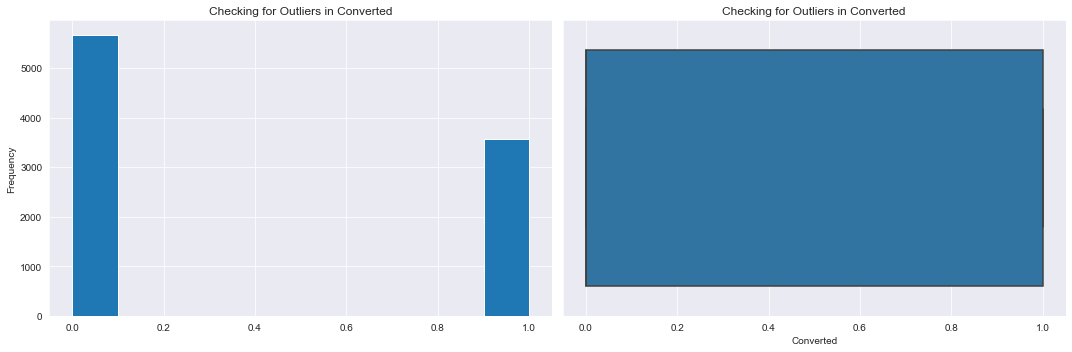

Plotting  TotalVisits


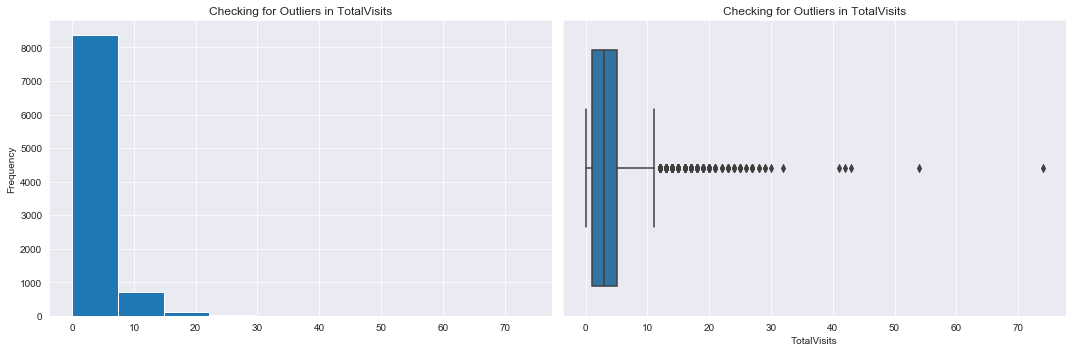

Plotting  Total Time Spent on Website


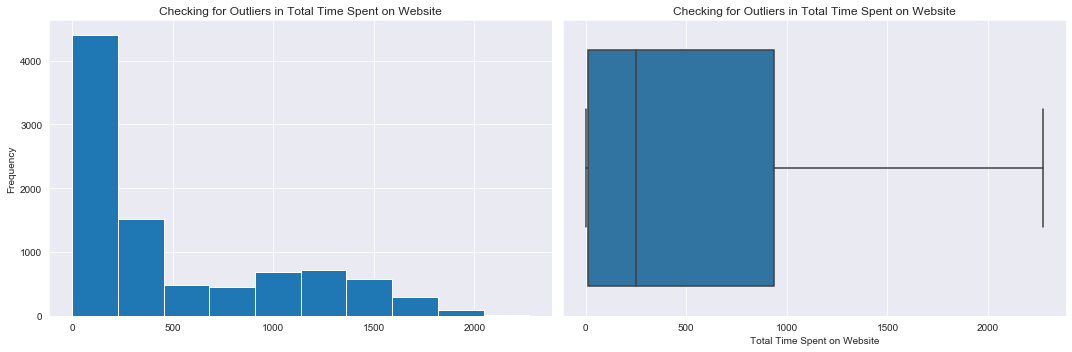

Plotting  Page Views Per Visit


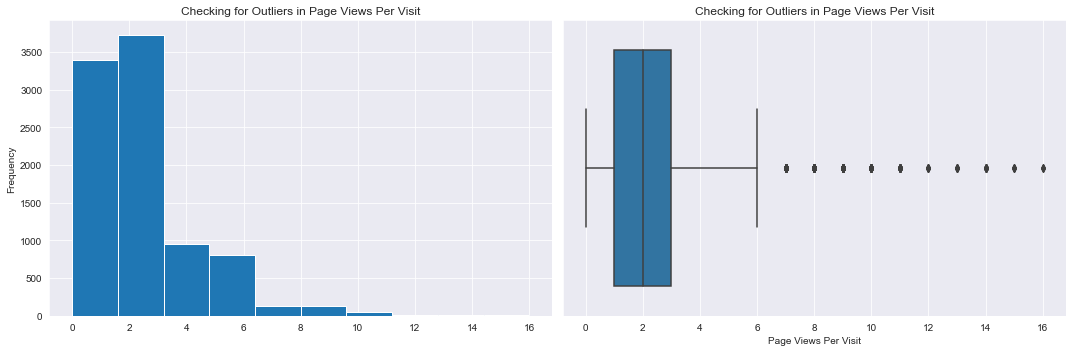

In [41]:
for column in num_cols:
    print("Plotting ", column)
    data_info(leads, column)

> These outliers are acceptable.

### Univariate Analysis (Categorical Variables)

In [42]:
# Leads that have not converted
(leads['Converted']==0).sum()

5676

In [43]:
# Leads that have converted
(leads['Converted']==1).sum()

3559

In [44]:
#Ratio of imbalance
(leads['Converted']==0).sum() / (leads['Converted']==1).sum()

1.594830008429334

In [45]:
# Since there is imbalance lets seperate the values

leads_0 = leads.loc[leads['Converted']==0]
leads_1 = leads.loc[leads['Converted']==1]

In [46]:
cat_cols = leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1, labels=None)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'Converted', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for converted in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for converted in terms of percentage')

    ax1.legend(labels= train[col].unique(), loc='center left', bbox_to_anchor=(1, 0.5))
    
    fig.tight_layout()

    plt.show()

Plotting  Lead Origin


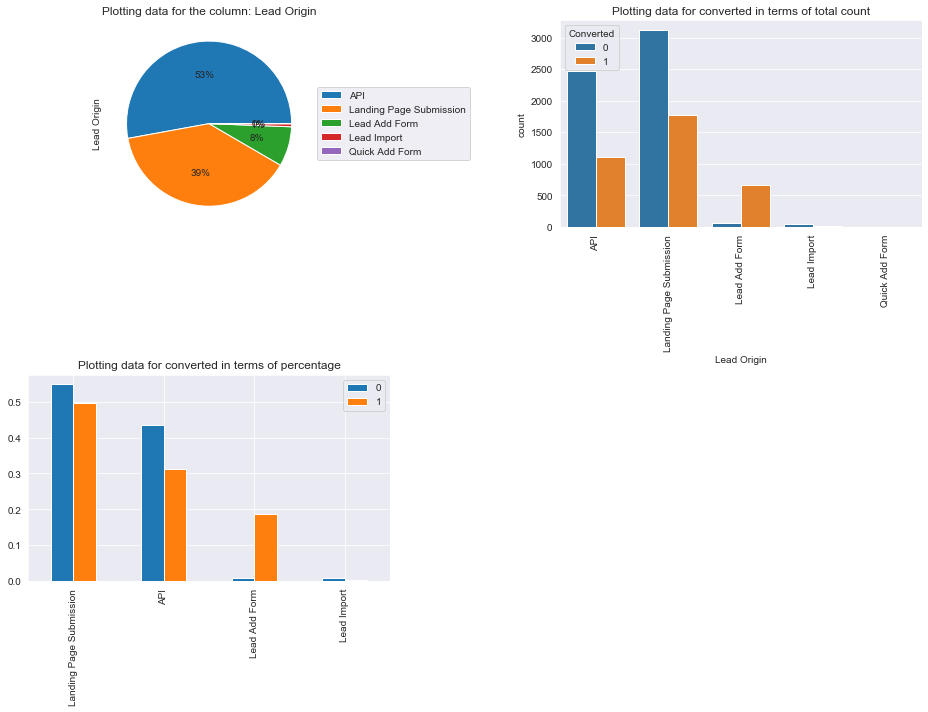

Plotting  Lead Source


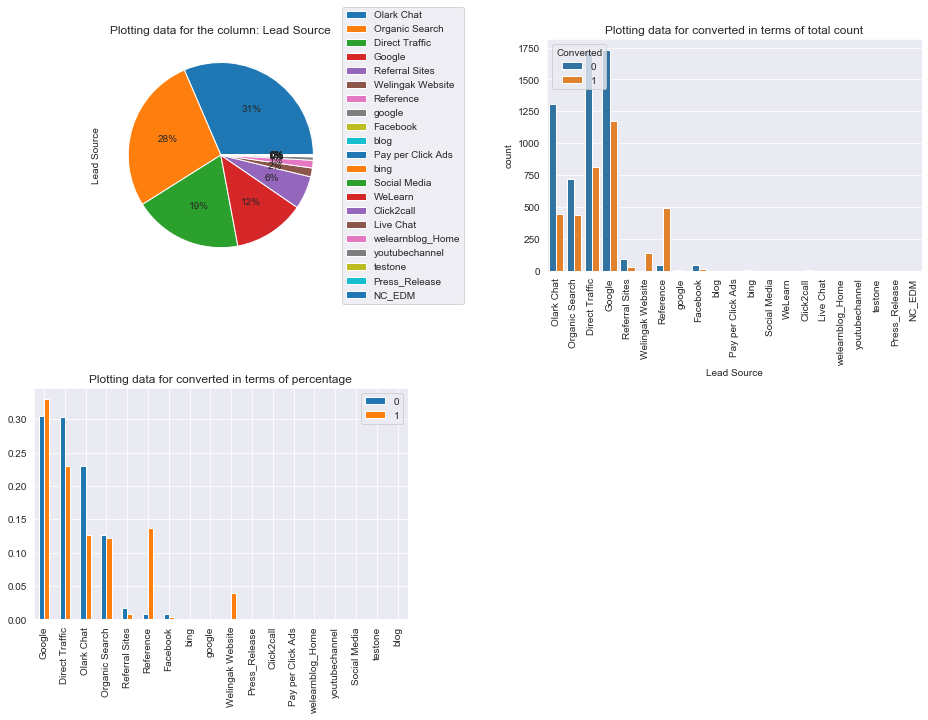

Plotting  Do Not Email


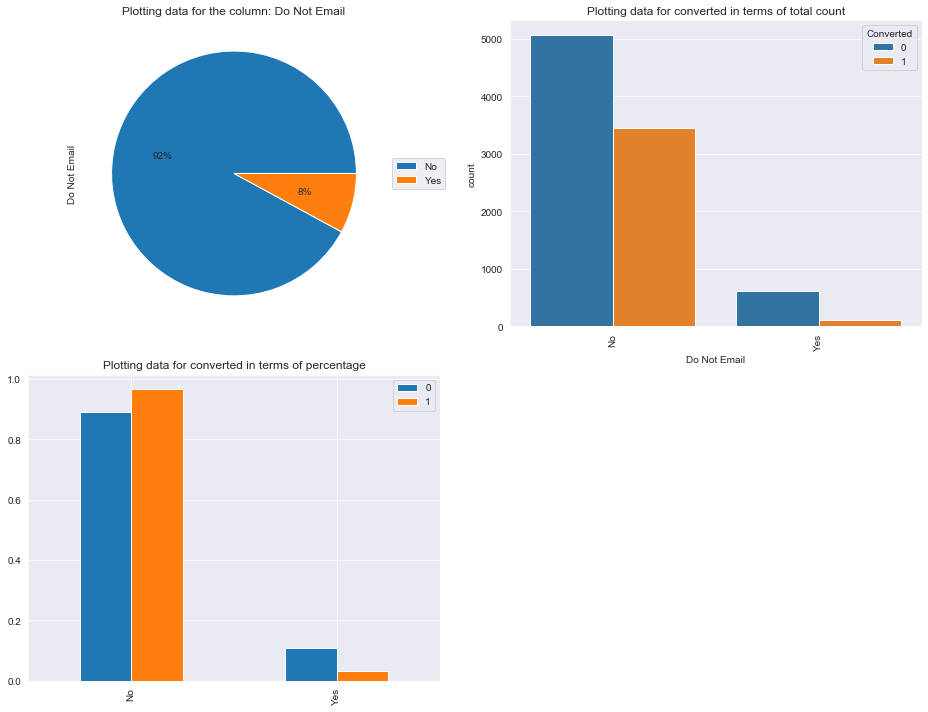

Plotting  Do Not Call


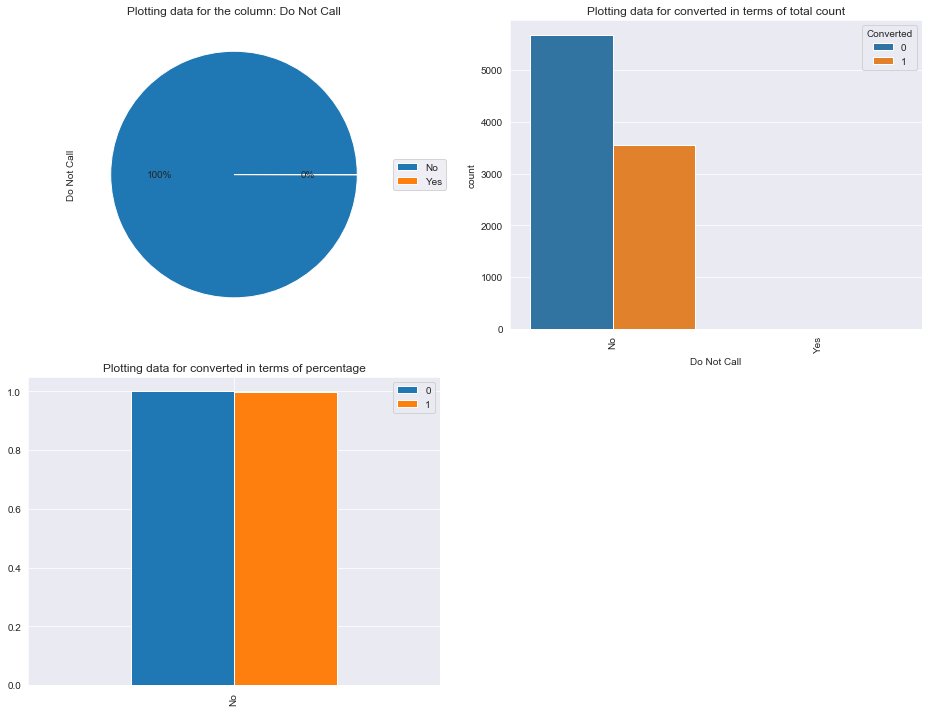

Plotting  Search


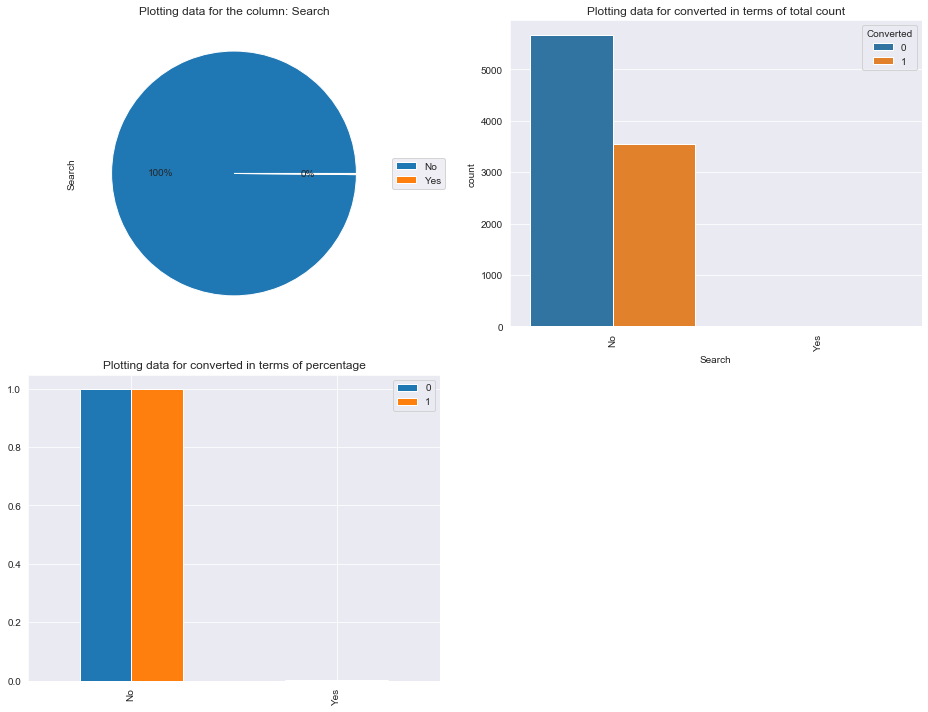

Plotting  Magazine


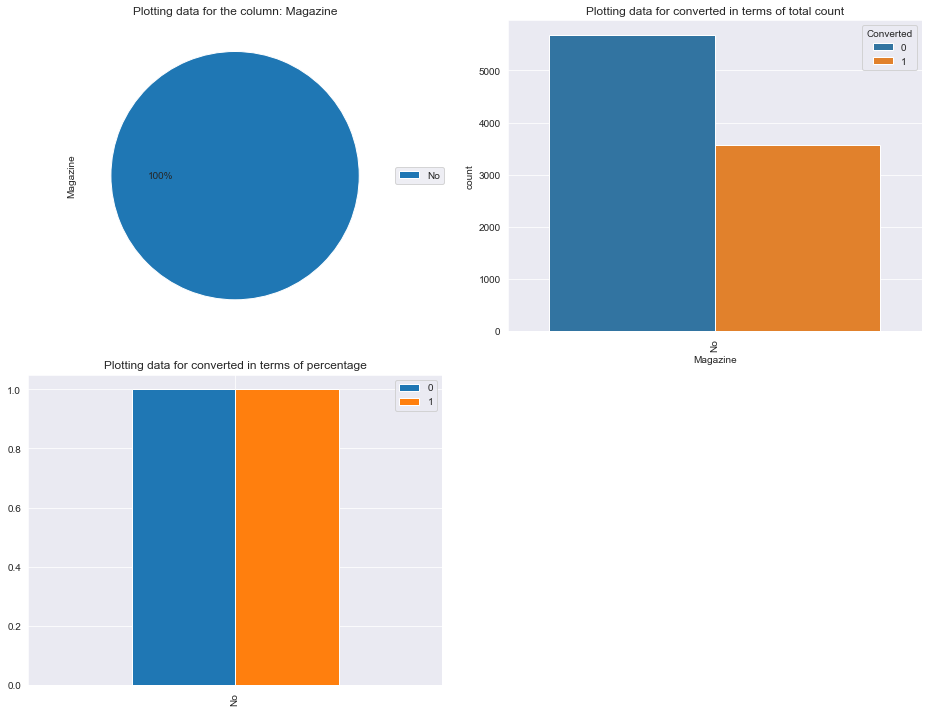

Plotting  Newspaper Article


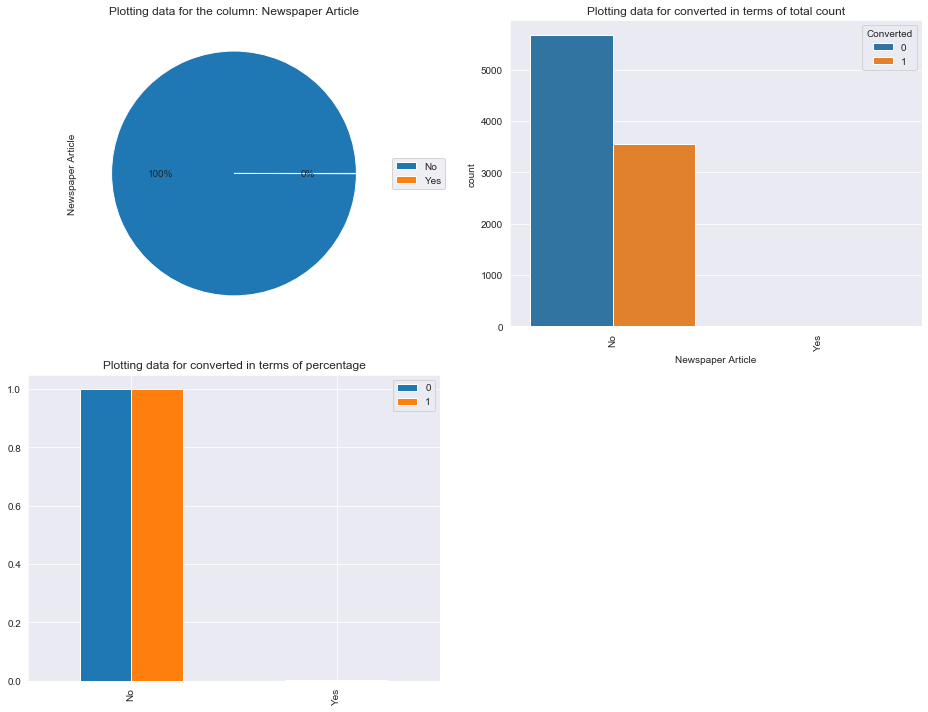

Plotting  X Education Forums


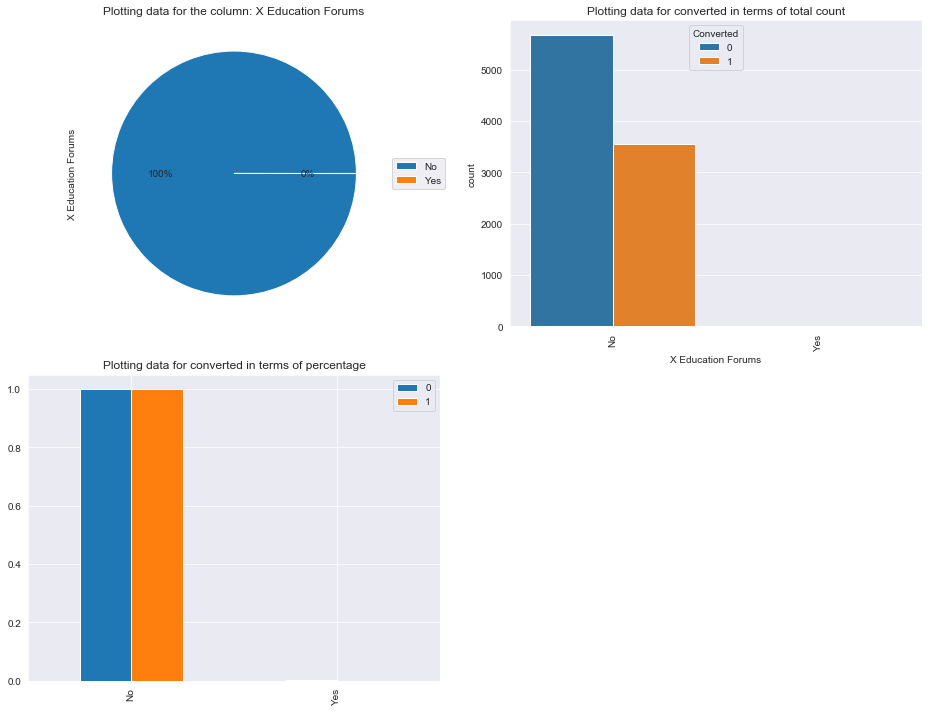

Plotting  Newspaper


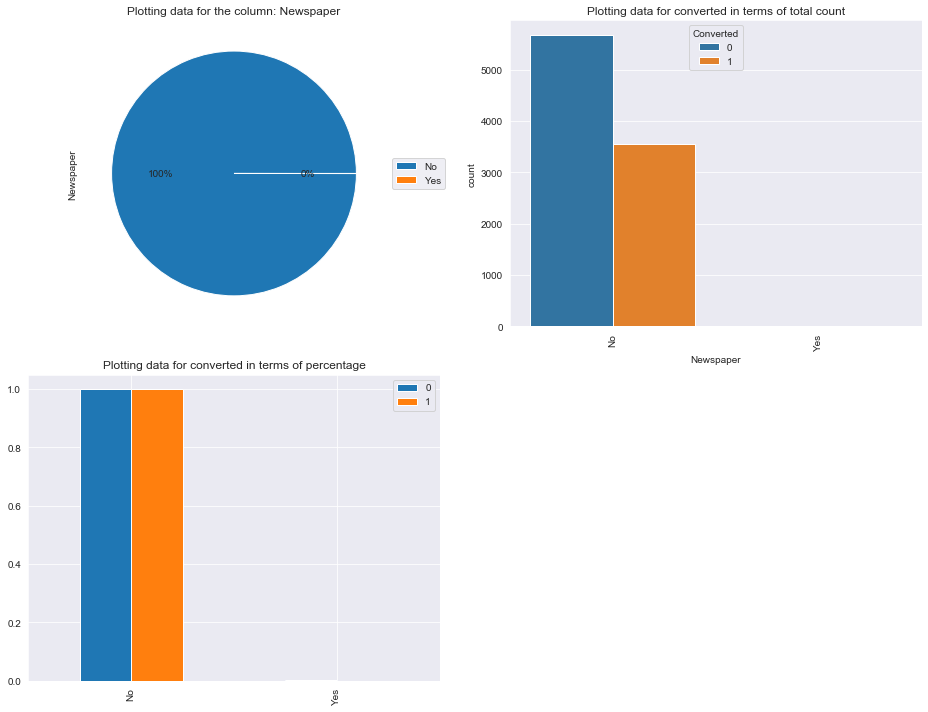

Plotting  Digital Advertisement


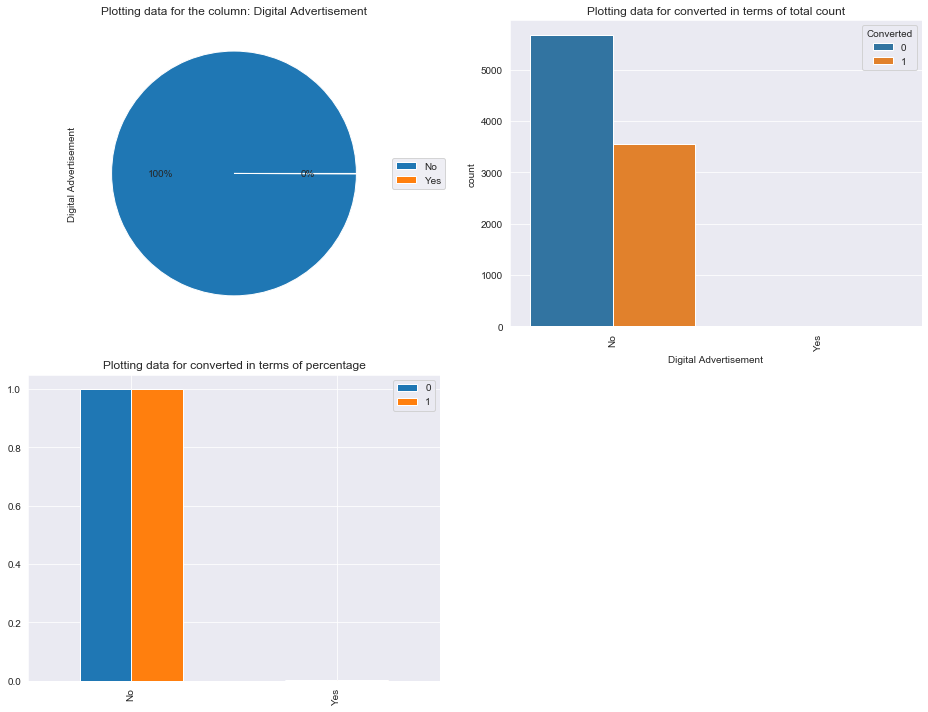

Plotting  Through Recommendations


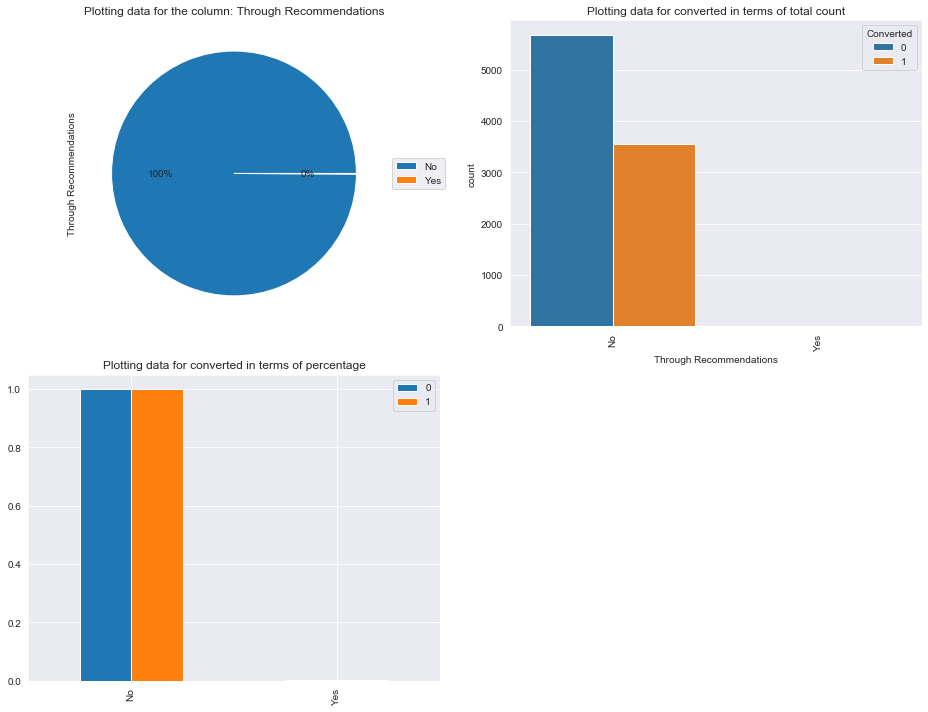

Plotting  Receive More Updates About Our Courses


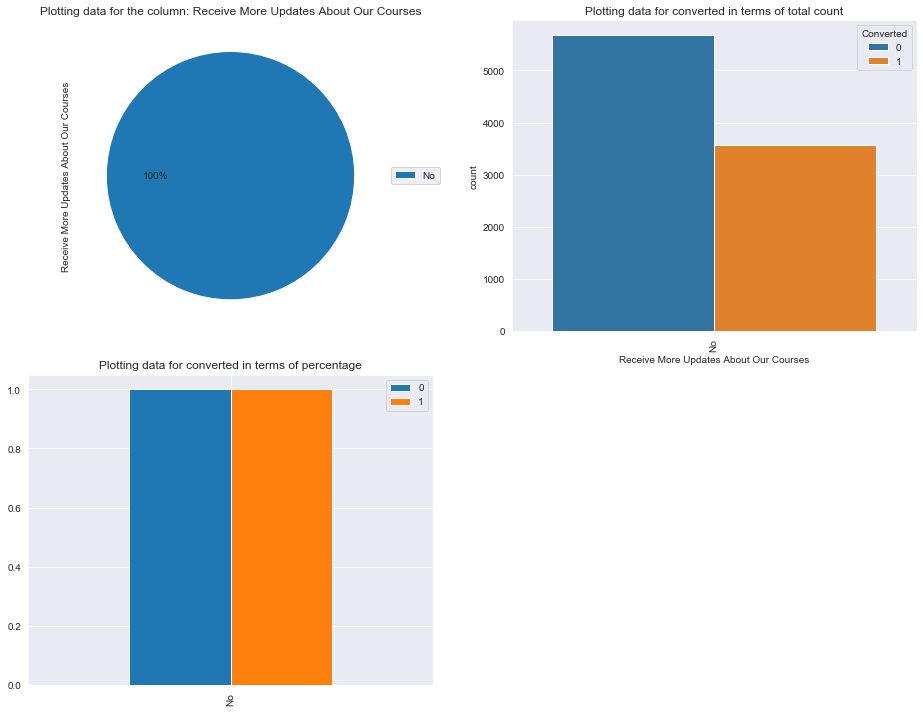

Plotting  Update me on Supply Chain Content


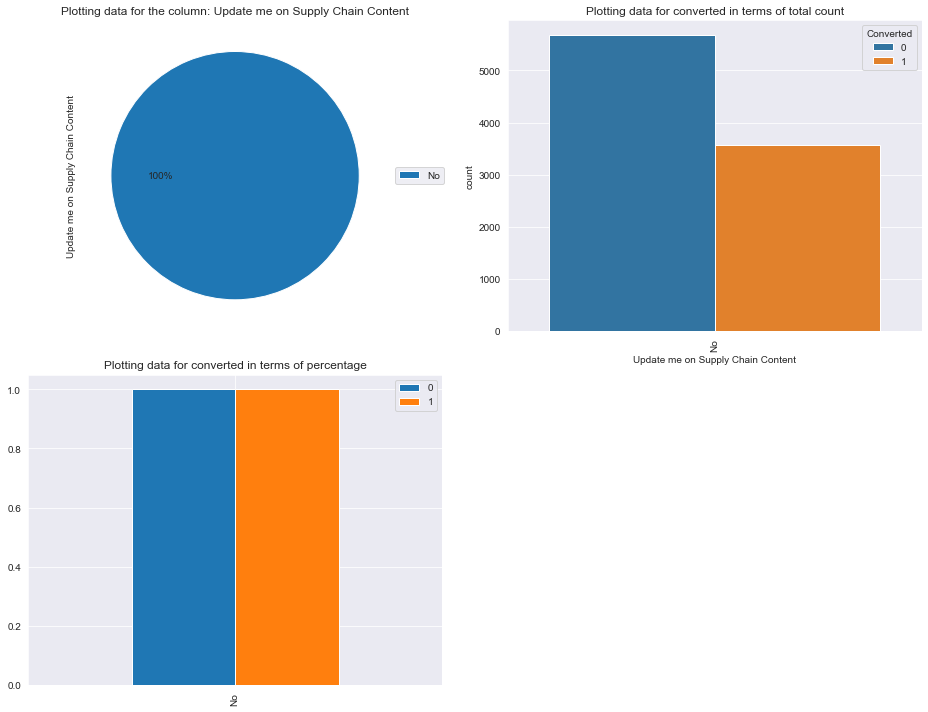

Plotting  Get updates on DM Content


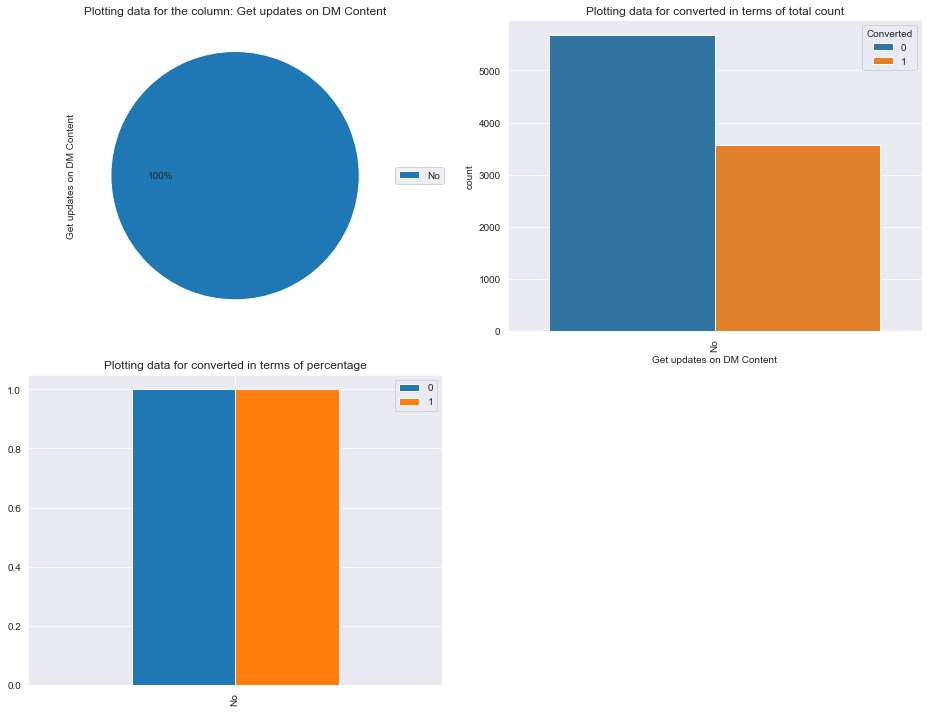

Plotting  I agree to pay the amount through cheque


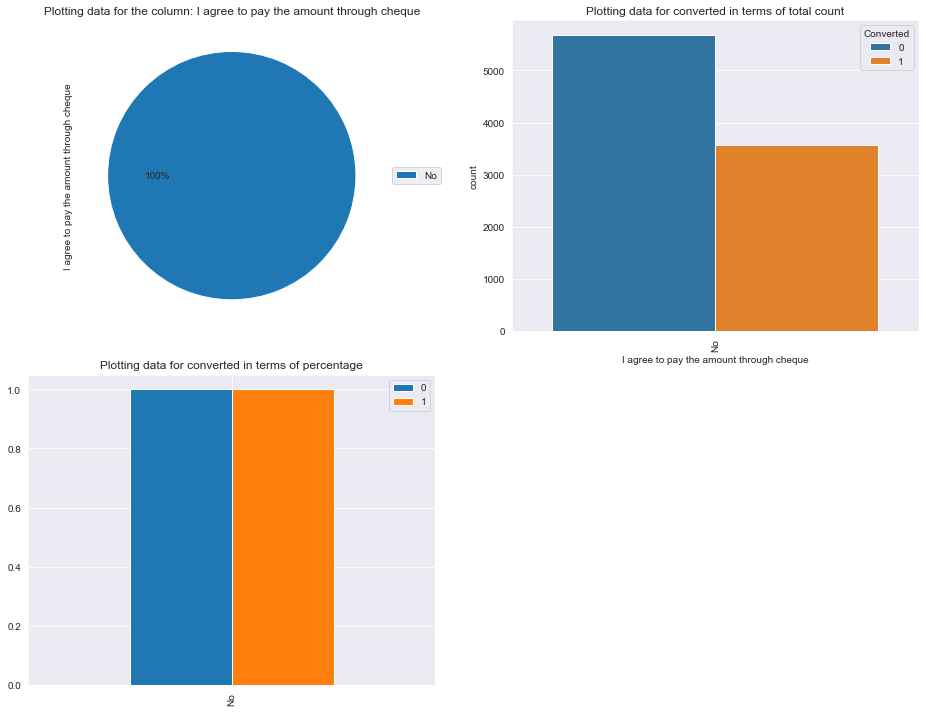

Plotting  A free copy of Mastering The Interview


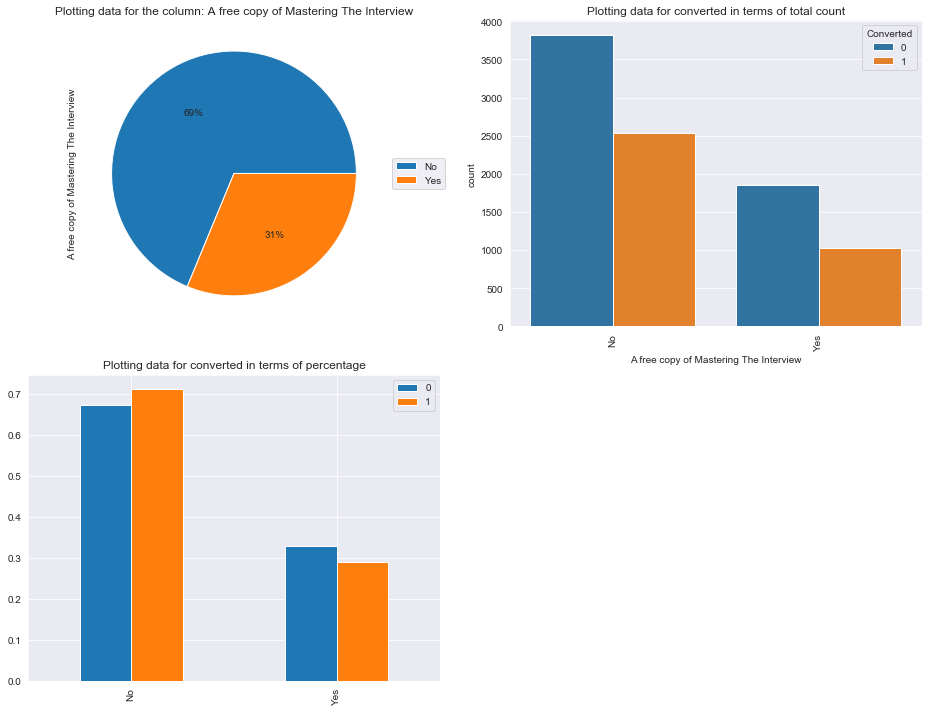

Plotting  Last Notable Activity


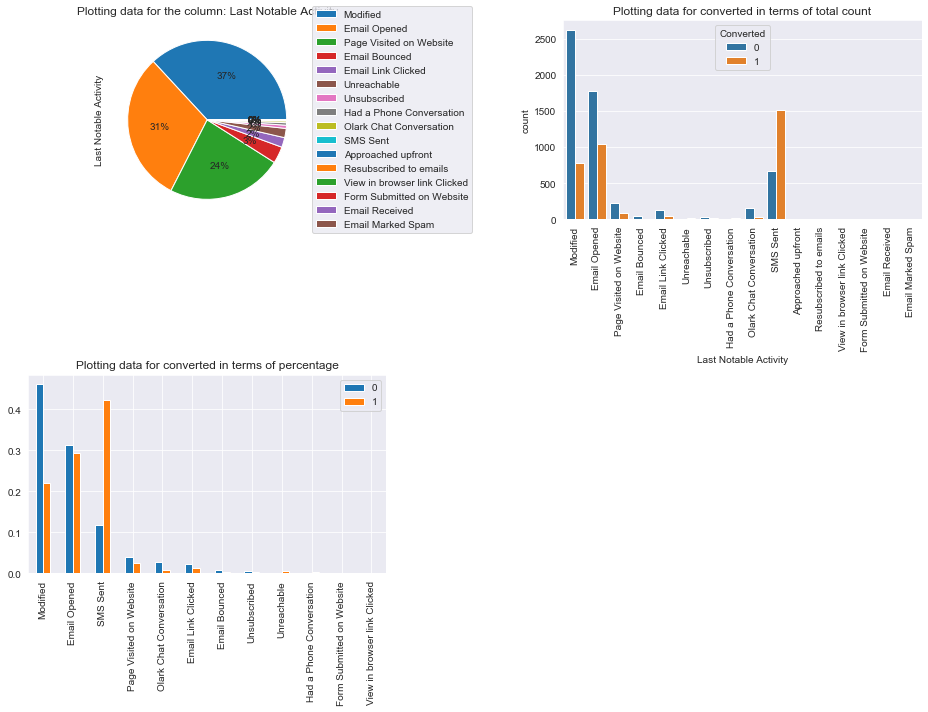

In [48]:
for column in cat_cols:
    print('\033[1m' + "Plotting ", column)
    plotting(leads,leads_0, leads_1, column)

In [49]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
leads = leads.drop(['Do Not Call','Search', 'Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 
                    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis=1)

### Bivariate Analysis

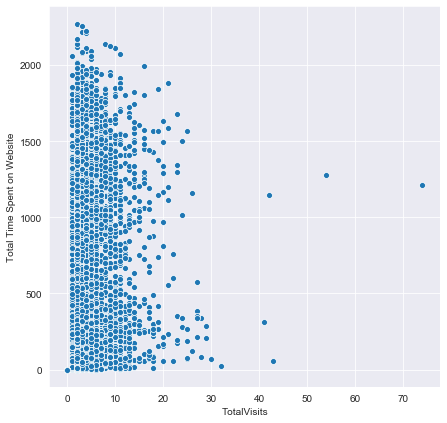

In [51]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='TotalVisits', y= 'Total Time Spent on Website', data=leads);

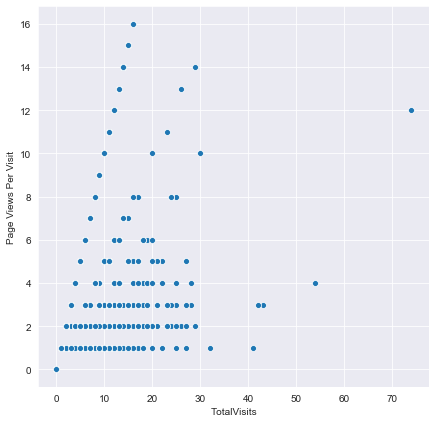

In [52]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='TotalVisits', y= 'Page Views Per Visit', data=leads);

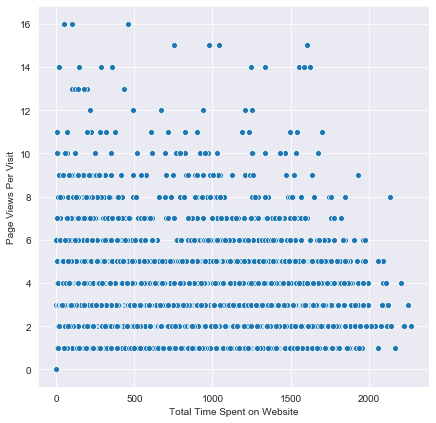

In [53]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Total Time Spent on Website', y= 'Page Views Per Visit', data=leads);

### Heatmap

In [54]:
#Corr of the data
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.036112,0.362494,-0.006867
TotalVisits,0.036112,1.000000,0.297347,0.617000
Total Time Spent on Website,0.362494,0.297347,1.000000,0.313926
Page Views Per Visit,-0.006867,0.617000,0.313926,1.000000


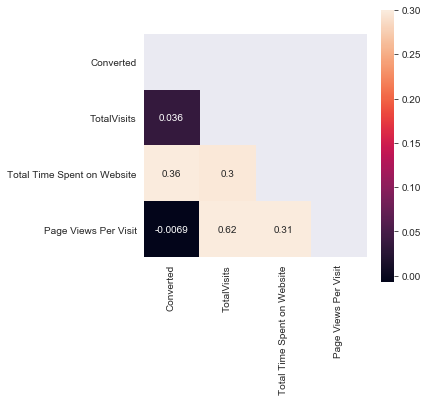

In [55]:
# Creating a mask for the repeated values on one half of the heatmap for the dataset

corr = leads.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(5,5))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, vmax=.3, square = True, annot=True);

In [56]:
#Looking at the cat cols
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [58]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,5,674,2,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2,1532,2,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1,305,1,0,Modified
4,Landing Page Submission,Google,0,1,2,1428,1,0,Modified


### Creating Dummy Variables 

> We need to create dummy variables for lead source, lead origin and last notable activity. If we map them to numbers they'll end up as weights, instead of acting as boolean values.

In [59]:
# Dummy variables for lead origin, lead source and last notable activity
origin = pd.get_dummies(leads['Lead Origin'], drop_first = True)
source = pd.get_dummies(leads['Lead Source'], drop_first=True)
activity = pd.get_dummies(leads['Last Notable Activity'], drop_first=True)

In [60]:
# Add the results to the original leads dataframe
leads = pd.concat([leads, origin, source, activity], axis=1)

In [61]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Notable Activity'], axis = 1)

In [62]:
#Looking at the new data
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,1532,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2,1428,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the data into Train & Test Datasets

The first step for any regression analysis is splitting the dataset into train and test datasets.

In [63]:
#Assigning feature variables to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5,674,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1532,2,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,2,1428,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
#Assigning response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
#Importing the necessary library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features

As we can see in the dataset majority of the values are in 1s and 0s, other than variables like `TotalVisits`. Therefore, we must rescale them to similar values so that the values fit would not be very large.

In [66]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
#Applying scaler() to necessary variables
var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[var] = scaler.fit_transform(X_train[var])

In [69]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
7417,0,-0.384462,2.030247,-0.135058,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1032,0,0.741574,1.621313,1.809301,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6537,0,0.178556,-0.321122,0.837121,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7284,0,0.178556,-0.702672,-0.135058,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3194,0,-0.947480,-0.892534,-1.107238,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at Correlations

In [70]:
X_train.corr()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
Do Not Email,1.000000,0.018015,-0.048079,0.028941,0.054692,0.099783,-0.019379,-0.021298,NaN,0.111412,...,-0.003698,-0.012275,0.136396,-0.021189,0.034769,NaN,-0.036166,-0.007651,0.233481,-0.003698
TotalVisits,0.018015,1.000000,0.287002,0.619334,0.250753,0.366780,-0.222461,-0.040373,NaN,0.110898,...,-0.004782,0.043297,-0.120584,-0.048928,0.215818,NaN,0.002375,0.011930,-0.002734,0.016228
Total Time Spent on Website,-0.048079,0.287002,1.000000,0.305540,0.163982,0.266690,-0.136702,-0.034789,NaN,0.128385,...,-0.004585,0.020448,-0.104672,-0.061802,0.032012,NaN,0.131533,-0.005198,-0.010747,-0.009081
Page Views Per Visit,0.028941,0.619334,0.305540,1.000000,0.272194,0.486425,-0.264300,-0.047661,NaN,0.137326,...,-0.001680,0.012669,-0.091156,-0.086133,0.010316,NaN,0.065615,0.023096,0.015660,-0.001680
A free copy of Mastering The Interview,0.054692,0.250753,0.163982,0.272194,1.000000,0.569456,-0.185055,-0.048330,NaN,0.603563,...,0.018437,-0.011665,-0.082084,-0.058398,0.044501,NaN,0.036364,0.006406,0.011123,0.018437
Landing Page Submission,0.099783,0.366780,0.266690,0.486425,0.569456,1.000000,-0.312963,-0.075717,NaN,0.523480,...,0.011768,0.008987,-0.095521,-0.114676,0.045987,NaN,0.058318,0.002079,0.007363,-0.013148
Lead Add Form,-0.019379,-0.222461,-0.136702,-0.264300,-0.185055,-0.312963,1.000000,-0.021210,NaN,-0.181462,...,-0.003683,-0.012225,-0.010076,-0.029197,-0.030503,NaN,0.087310,0.002213,-0.004102,-0.003683
Lead Import,-0.021298,-0.040373,-0.034789,-0.047661,-0.048330,-0.075717,-0.021210,1.000000,NaN,-0.043902,...,-0.000891,-0.002958,0.026733,-0.010059,-0.013446,NaN,-0.035238,-0.004186,-0.004973,-0.000891
Quick Add Form,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direct Traffic,0.111412,0.110898,0.128385,0.137326,0.603563,0.523480,-0.181462,-0.043902,NaN,1.000000,...,0.020296,-0.016879,-0.048659,-0.073455,0.066891,NaN,0.015765,-0.017929,-0.002335,-0.007623


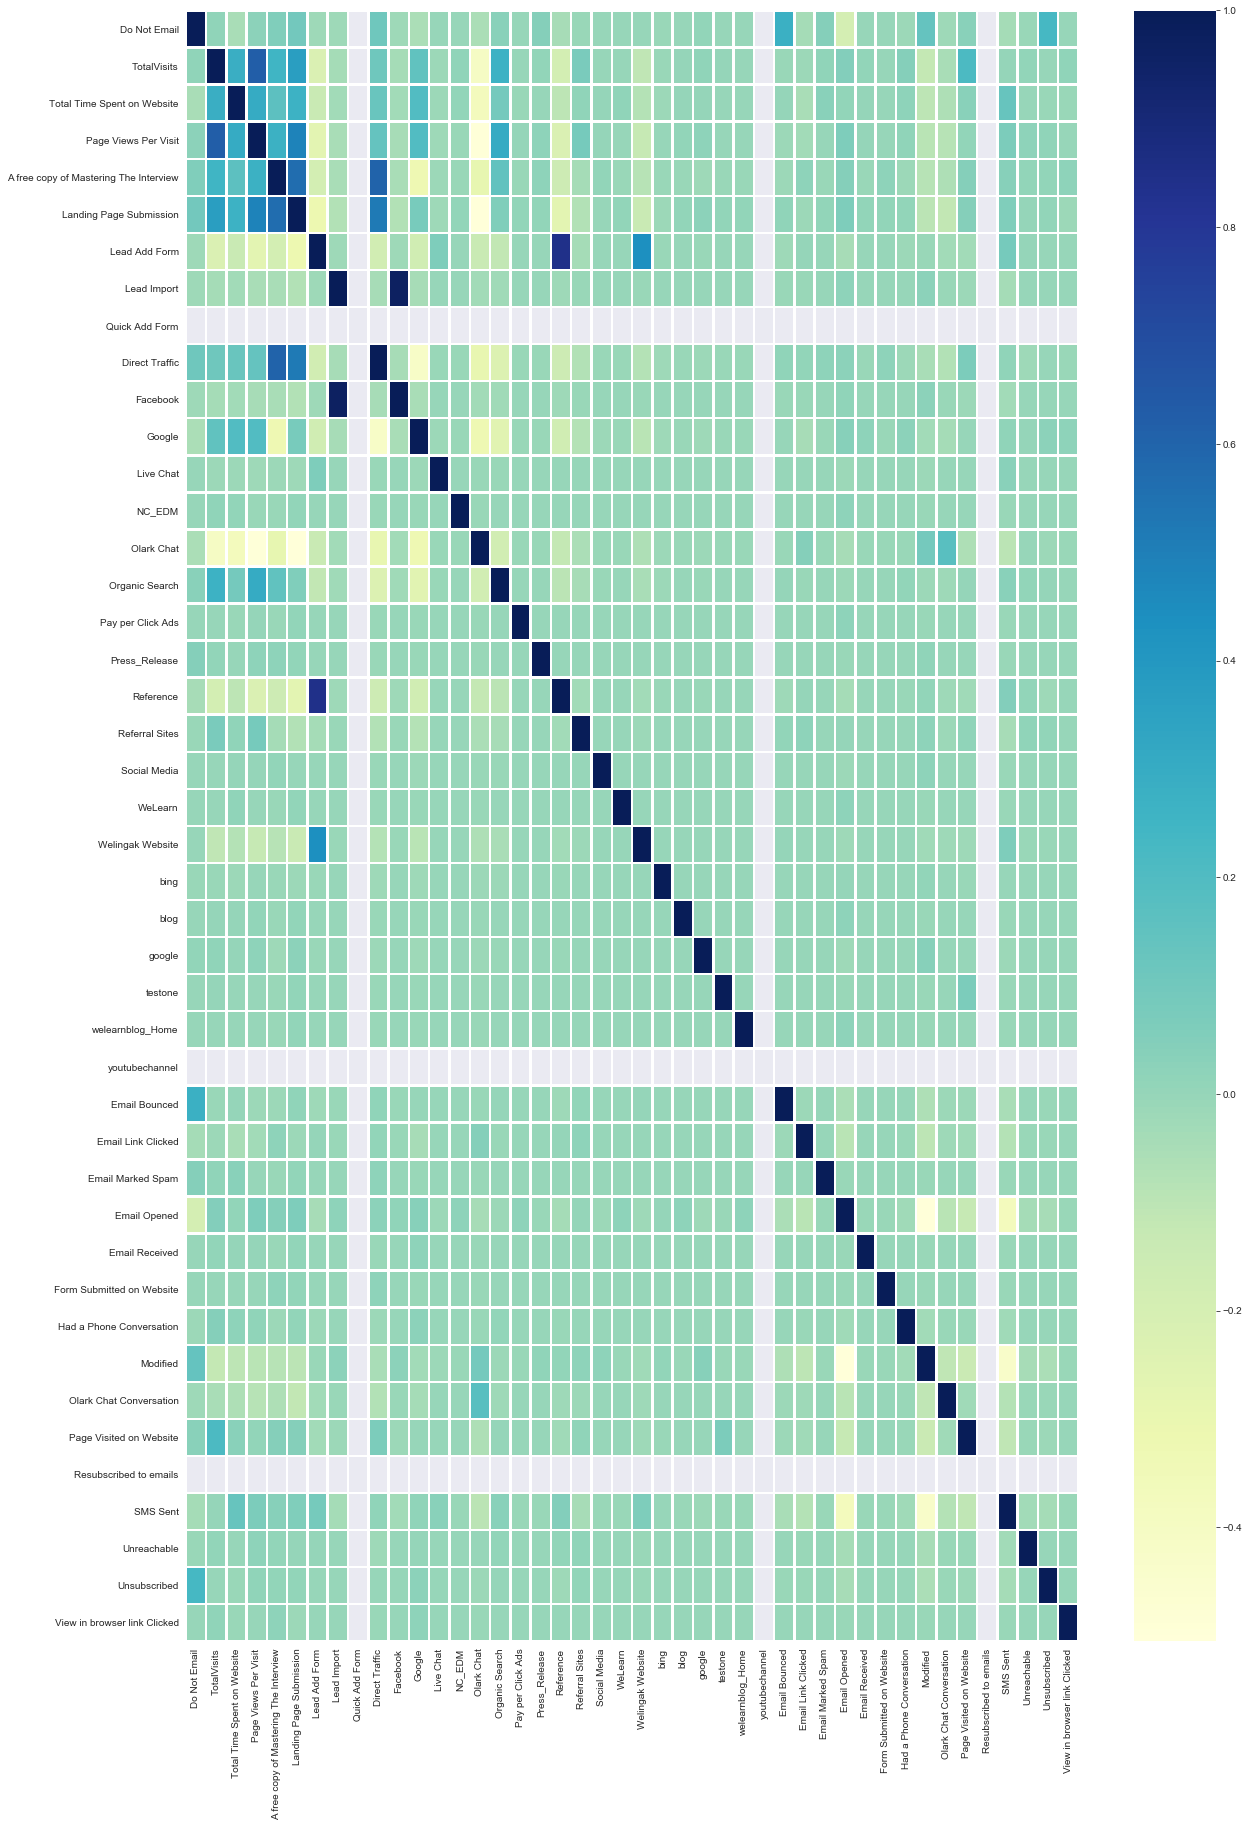

In [71]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(),cmap="YlGnBu", linewidth=1.5)
plt.show()

In [72]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form', 'Direct Traffic', 'Facebook', 'Google', 'Live Chat',
       'NC_EDM', 'Olark Chat', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Reference', 'Referral Sites', 'Social Media',
       'WeLearn', 'Welingak Website', 'bing', 'blog', 'google', 'testone',
       'welearnblog_Home', 'youtubechannel', 'Email Bounced',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked'],
      dtype='object')

## Model Building

In [73]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
# Import RFE
from sklearn.feature_selection import RFE

In [75]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [76]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 25),
 ('Landing Page Submission', False, 20),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 27),
 ('Quick Add Form', False, 30),
 ('Direct Traffic', False, 6),
 ('Facebook', False, 15),
 ('Google', False, 16),
 ('Live Chat', False, 24),
 ('NC_EDM', False, 3),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 14),
 ('Pay per Click Ads', False, 18),
 ('Press_Release', False, 26),
 ('Reference', True, 1),
 ('Referral Sites', False, 12),
 ('Social Media', False, 2),
 ('WeLearn', False, 8),
 ('Welingak Website', True, 1),
 ('bing', False, 13),
 ('blog', False, 7),
 ('google', True, 1),
 ('testone', False, 23),
 ('welearnblog_Home', False, 11),
 ('youtubechannel', False, 28),
 ('Email Bounced', False, 9),
 ('Email Link Clicked', False, 4),
 ('Email Marked Spam', False, 5),
 ('Email Opened', False

In [77]:
columns = X_train.columns[rfe.support_]

In [78]:
# Selecting columns selected by RFE
X_train_rfe = X_train[columns]

In [79]:
# Importing statsmodels
import statsmodels.api as sm

### Model no. 1

In [80]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2883.6
Date:                Mon, 08 Mar 2021   Deviance:                       5767.2
Time:                        15:57:50   Pearson chi2:                 6.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9918      0.057    -17.263      0.000      -1.104      -0.879
Do Not Email                   -1.7230      0.184     -9.385      0.000      -2.083      -1.363
Total Time Spent on Website     1.1244      0.039     29.098      0.000       1.049       1.200
Lead Add Form                   3.4051      0.511      6.667      0.000       2.404       4.406
Olark Chat                      1.0021      0.095     10.547      0.000       0.816       1.188
Reference                       0.8878      0.544      1.631      0.103      -0.179       1.955
Welingak Website                3.1027      1.128      2.750      0.006       0.892       5.314
google                        -20.9770   1.92e+04     -0.001      0.999   -3.76e+04    3.75e+04
Email Received                 22.9994   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        3.2834      1.091      3.009      0.003       1.145       5.422
Modified                       -0.7630      0.081     -9.383      0.000      -0.922      -0.604
Olark Chat Conversation        -1.4981      0.317     -4.723      0.000      -2.120      -0.876
Page Visited on Website        -0.5239      0.192     -2.731      0.006      -0.900      -0.148
SMS Sent                        1.3272      0.083     15.967      0.000       1.164       1.490
Unreachable                     1.7292      0.522      3.312      0.001       0.706       2.752
Unsubscribed                    1.5287      0.486      3.143      0.002       0.575       2.482
===============================================================================================
"""

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Add Form,16.58
4,Reference,13.06
5,Welingak Website,4.37
3,Olark Chat,1.42
9,Modified,1.29
1,Total Time Spent on Website,1.22
0,Do Not Email,1.20
12,SMS Sent,1.15
14,Unsubscribed,1.07
10,Olark Chat Conversation,1.06


> We will first remove high p stats values, one by one and then work on high VIF values. Any variable with P Val higher than 0.005 must be dropped.

In [82]:
#Dropping email recieved
X_train_rfe = X_train_rfe.drop(['Email Received'], axis=1)

### Model no. 2

In [83]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.6
Date:                Mon, 08 Mar 2021   Deviance:                       5769.1
Time:                        15:57:50   Pearson chi2:                 6.64e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9900      0.057    -17.242      0.000      -1.103      -0.877
Do Not Email                   -1.7233      0.184     -9.387      0.000      -2.083      -1.363
Total Time Spent on Website     1.1245      0.039     29.101      0.000       1.049       1.200
Lead Add Form                   3.4049      0.511      6.666      0.000       2.404       4.406
Olark Chat                      1.0014      0.095     10.541      0.000       0.815       1.188
Reference                       0.8875      0.544      1.630      0.103      -0.180       1.954
Welingak Website                3.1023      1.128      2.750      0.006       0.891       5.313
google                        -19.9772   1.16e+04     -0.002      0.999   -2.28e+04    2.27e+04
Had a Phone Conversation        3.2816      1.091      3.007      0.003       1.143       5.420
Modified                       -0.7647      0.081     -9.404      0.000      -0.924      -0.605
Olark Chat Conversation        -1.4995      0.317     -4.728      0.000      -2.121      -0.878
Page Visited on Website        -0.5257      0.192     -2.740      0.006      -0.902      -0.150
SMS Sent                        1.3255      0.083     15.950      0.000       1.163       1.488
Unreachable                     1.7276      0.522      3.309      0.001       0.704       2.751
Unsubscribed                    1.5273      0.486      3.140      0.002       0.574       2.481
===============================================================================================
"""

> The next highest pvalue is `google`, so we remove that variable from the model.

In [84]:
#Dropping google
X_train_rfe = X_train_rfe.drop(['google'], axis=1)

### Model no. 3

In [85]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.6
Date:                Mon, 08 Mar 2021   Deviance:                       5771.2
Time:                        15:57:51   Pearson chi2:                 6.64e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9903      0.057    -17.246      0.000      -1.103      -0.878
Do Not Email                   -1.7225      0.184     -9.383      0.000      -2.082      -1.363
Total Time Spent on Website     1.1243      0.039     29.100      0.000       1.049       1.200
Lead Add Form                   3.4057      0.511      6.667      0.000       2.405       4.407
Olark Chat                      1.0028      0.095     10.554      0.000       0.817       1.189
Reference                       0.8886      0.544      1.632      0.103      -0.179       1.956
Welingak Website                3.1029      1.128      2.751      0.006       0.892       5.314
Had a Phone Conversation        3.2818      1.091      3.008      0.003       1.143       5.421
Modified                       -0.7681      0.081     -9.450      0.000      -0.927      -0.609
Olark Chat Conversation        -1.5001      0.317     -4.730      0.000      -2.122      -0.878
Page Visited on Website        -0.5255      0.192     -2.739      0.006      -0.902      -0.149
SMS Sent                        1.3255      0.083     15.951      0.000       1.163       1.488
Unreachable                     1.7275      0.522      3.309      0.001       0.704       2.751
Unsubscribed                    1.5265      0.486      3.138      0.002       0.573       2.480
===============================================================================================
"""

> `Reference` variable has a 0.103 pvalue, which is very high. Thus, we must drop it.

In [86]:
X_train_rfe = X_train_rfe.drop(['Reference'], axis=1)

### Model no. 4

In [87]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.8
Date:                Mon, 08 Mar 2021   Deviance:                       5773.6
Time:                        15:57:51   Pearson chi2:                 6.63e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9886      0.057    -17.227      0.000      -1.101      -0.876
Do Not Email                   -1.7569      0.184     -9.528      0.000      -2.118      -1.395
Total Time Spent on Website     1.1240      0.039     29.091      0.000       1.048       1.200
Lead Add Form                   4.1985      0.193     21.734      0.000       3.820       4.577
Olark Chat                      1.0010      0.095     10.535      0.000       0.815       1.187
Welingak Website                2.3137      1.025      2.257      0.024       0.304       4.323
Had a Phone Conversation        3.2800      1.091      3.006      0.003       1.141       5.419
Modified                       -0.7660      0.081     -9.434      0.000      -0.925      -0.607
Olark Chat Conversation        -1.4978      0.317     -4.729      0.000      -2.118      -0.877
Page Visited on Website        -0.5253      0.192     -2.737      0.006      -0.902      -0.149
SMS Sent                        1.3234      0.083     15.926      0.000       1.161       1.486
Unreachable                     1.7280      0.522      3.310      0.001       0.705       2.751
Unsubscribed                    1.5133      0.497      3.046      0.002       0.540       2.487
===============================================================================================
"""

> `Welingak Website` has a pvalue of 0.024. It is unacceptable and hence, we must drop it.

In [88]:
X_train_rfe = X_train_rfe.drop(['Welingak Website'], axis=1)

### Model no. 5

In [89]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.1
Date:                Mon, 08 Mar 2021   Deviance:                       5784.3
Time:                        15:57:51   Pearson chi2:                 6.75e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9876      0.057    -17.217      0.000      -1.100      -0.875
Do Not Email                   -1.7463      0.183     -9.553      0.000      -2.105      -1.388
Total Time Spent on Website     1.1237      0.039     29.073      0.000       1.048       1.199
Lead Add Form                   4.4226      0.188     23.492      0.000       4.054       4.792
Olark Chat                      1.0013      0.095     10.536      0.000       0.815       1.188
Had a Phone Conversation        3.2789      1.091      3.005      0.003       1.140       5.418
Modified                       -0.7702      0.081     -9.491      0.000      -0.929      -0.611
Olark Chat Conversation        -1.5051      0.318     -4.737      0.000      -2.128      -0.882
Page Visited on Website        -0.5288      0.192     -2.753      0.006      -0.905      -0.152
SMS Sent                        1.3237      0.083     15.943      0.000       1.161       1.486
Unreachable                     1.7245      0.522      3.301      0.001       0.701       2.748
Unsubscribed                    1.4922      0.498      2.994      0.003       0.515       2.469
===============================================================================================
"""

> Finally, we remove `Page Visited on Website` as it has a p val of 0.006.

In [90]:
X_train_rfe = X_train_rfe.drop(['Page Visited on Website'], axis=1)

In [91]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6464
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.1
Date:                Mon, 08 Mar 2021   Deviance:                       5792.2
Time:                        15:57:51   Pearson chi2:                 6.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0316      0.055    -18.621      0.000      -1.140      -0.923
Do Not Email                   -1.7652      0.182     -9.686      0.000      -2.122      -1.408
Total Time Spent on Website     1.1207      0.039     29.053      0.000       1.045       1.196
Lead Add Form                   4.4326      0.188     23.548      0.000       4.064       4.802
Olark Chat                      1.0094      0.095     10.624      0.000       0.823       1.196
Had a Phone Conversation        3.3217      1.091      3.045      0.002       1.183       5.460
Modified                       -0.7275      0.080     -9.119      0.000      -0.884      -0.571
Olark Chat Conversation        -1.4666      0.317     -4.622      0.000      -2.088      -0.845
SMS Sent                        1.3671      0.082     16.735      0.000       1.207       1.527
Unreachable                     1.7662      0.522      3.381      0.001       0.742       2.790
Unsubscribed                    1.5538      0.498      3.122      0.002       0.578       2.529
===============================================================================================
"""

In [92]:
#checking VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Olark Chat,1.41
5,Modified,1.28
1,Total Time Spent on Website,1.21
0,Do Not Email,1.18
7,SMS Sent,1.15
2,Lead Add Form,1.13
9,Unsubscribed,1.07
6,Olark Chat Conversation,1.06
4,Had a Phone Conversation,1.00
8,Unreachable,1.00


> Any VIF that is higher than 5 is unacceptable. Here we can see all the VIF values are less than 5. Therefore, we continue with this model.

In [93]:
col = X_train_rfe.columns
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Olark Chat', 'Had a Phone Conversation', 'Modified',
       'Olark Chat Conversation', 'SMS Sent', 'Unreachable', 'Unsubscribed'],
      dtype='object')

In [94]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7417    0.931555
1032    0.895905
6537    0.493904
7284    0.139546
3194    0.916885
712     0.079412
3947    0.145293
3436    0.362419
6609    0.087383
4686    0.493392
dtype: float64

In [95]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93155523, 0.89590498, 0.49390374, 0.13954627, 0.91688466,
       0.0794123 , 0.14529302, 0.36241873, 0.08738309, 0.49339233])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [96]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.931555,7417
1,1,0.895905,1032
2,0,0.493904,6537
3,0,0.139546,7284
4,1,0.916885,3194


### Creating a new column of predicted

In [97]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.931555,7417,1
1,1,0.895905,1032,1
2,0,0.493904,6537,0
3,0,0.139546,7284,0
4,1,0.916885,3194,1


In [98]:
from sklearn import metrics

In [99]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3439  515]
 [ 821 1689]]


In [100]:
# Predicted     not_churn    churn
# Actual
# not_churn        3439      515
# churn            821       1689  

In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7933168316831684


### Metric Beyond Accuracy

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6729083665338645

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.8697521497218007

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1302478502781993


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.7663339382940109


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8072769953051643


## Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [108]:
#ROC Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

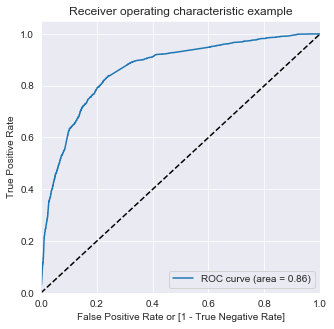

In [110]:
#ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [111]:
#Let's create columns with different probablitity cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.931555,7417,1,1,1,1,1,1,1,1,1,1,1
1,1,0.895905,1032,1,1,1,1,1,1,1,1,1,1,0
2,0,0.493904,6537,0,1,1,1,1,1,0,0,0,0,0
3,0,0.139546,7284,0,1,1,0,0,0,0,0,0,0,0
4,1,0.916885,3194,1,1,1,1,1,1,1,1,1,1,1


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388304  1.000000  0.000000
0.1   0.1  0.532178  0.974104  0.251644
0.2   0.2  0.735613  0.903187  0.629236
0.3   0.3  0.790842  0.826693  0.768083
0.4   0.4  0.796566  0.760159  0.819676
0.5   0.5  0.793317  0.672908  0.869752
0.6   0.6  0.774443  0.547012  0.918816
0.7   0.7  0.758199  0.462948  0.945625
0.8   0.8  0.739016  0.383665  0.964593
0.9   0.9  0.691368  0.225498  0.987102


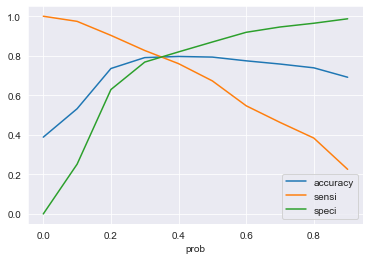

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curve we can see that 0.35 is the optimum point to take as cutoff probabiity. 

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.931555,7417,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.895905,1032,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.493904,6537,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.139546,7284,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.916885,3194,1,1,1,1,1,1,1,1,1,1,1,1


In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908415841584159

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3037,  917],
       [ 435, 2075]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8266932270916335

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.7680829539706626

In [120]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23191704602933738


In [121]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6935160427807486


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8747119815668203


## Precision and Recall Tradeoff

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6459    1
 6460    1
 6461    1
 6462    0
 6463    0
 Name: Converted, Length: 6464, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6459    1
 6460    1
 6461    1
 6462    0
 6463    0
 Name: predicted, Length: 6464, dtype: int64)

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

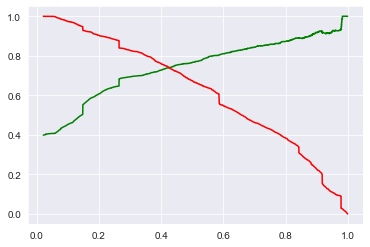

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on the Test Set

In [127]:
#Applying scaler() to necessary variables
var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[var] = scaler.fit_transform(X_test[var])

In [128]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Olark Chat,Had a Phone Conversation,Modified,Olark Chat Conversation,SMS Sent,Unreachable,Unsubscribed
4872,0,-0.809017,0,0,0,0,0,0,0,0
1949,0,-0.883764,0,1,0,1,0,0,0,0
5339,0,1.090650,0,0,0,0,0,1,0,0
7152,0,-0.883764,0,1,0,1,0,0,0,0
1025,0,0.842709,0,0,0,0,1,0,0,0


In [129]:
X_test_sm = sm.add_constant(X_test)

**Making Predictions on the Test Dataset.**

In [130]:
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

4872    0.125841
1949    0.149302
5339    0.826039
7152    0.149302
1025    0.174554
2427    0.397010
5867    0.266466
5251    0.655269
2854    0.767842
9197    0.146462
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

,0
4872,0.125841
1949,0.149302
5339,0.826039
7152,0.149302
1025,0.174554


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4872,0.125841
1,1,1949,0.149302
2,1,5339,0.826039
3,0,7152,0.149302
4,1,1025,0.174554


In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [140]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadID','Converted','Conv_Prob']]

In [141]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conv_Prob
0,4872,1,0.125841
1,1949,1,0.149302
2,5339,1,0.826039
3,7152,0,0.149302
4,1025,1,0.174554


In [142]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [143]:
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,4872,1,0.125841,0
1,1949,1,0.149302,0
2,5339,1,0.826039,1
3,7152,0,0.149302,0
4,1025,1,0.174554,0


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8029592204980152

In [145]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1447,  275],
       [ 271,  778]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7416587225929456

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.8403019744483159